In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
model_metadata = pd.read_csv("../../config/models.csv")
palette = model_metadata.set_index("description")["color"].to_dict()
model_renaming = model_metadata.set_index("name")["description"].to_dict()
model_metadata

,name,description,color
0,CADD,CADD,C0
1,GPN-MSA,GPN-MSA,C1
2,Borzoi,Borzoi,C2
3,Enformer,Enformer,C3
4,GPN_final,GPN-Promoter,C4
5,NucleotideTransformer,NT,C5
6,HyenaDNA,HyenaDNA,C6
7,Caduceus,Caduceus,hotpink
8,CADD+GPN-MSA+Borzoi,Ensemble,C8
9,Sei,Sei,C9


In [3]:
dataset_renaming = {
    "mendelian_traits_matched_9": "Mendelian traits",
    "complex_traits_matched_9": "Complex traits",
}

subset_renaming = {
    "nonexonic_AND_distal": "Non-exonic\n(distal)",
    "nonexonic_AND_proximal": "Non-exonic\n(proximal)",
    "5_prime_UTR_variant": "5' UTR",
    "3_prime_UTR_variant": "3' UTR",
    "non_coding_transcript_exon_variant": "ncRNA",
}

In [20]:
datasets = [
    "mendelian_traits_matched_9",
    "complex_traits_matched_9",
]

subsets = [
    #"nonexonic_AND_distal",
    "nonexonic_AND_proximal",
    #"5_prime_UTR_variant",
    #"3_prime_UTR_variant",
    #"non_coding_transcript_exon_variant",
]

scores = [
    "LLR",
    "EuclideanDistance",
]

models = [
    "evo2_1b_base",
    "evo2_7b",
    "evo2_40b",
    "GPN_final",
]

metric = "AUPRC"

def get_model_path(model, dataset, subset, score):
    if score == "EuclideanDistance":
        predictor = f"{model}_Embeddings.plus.euclidean_distance"
    elif score == "LLR":
        if "mendelian" in dataset:
            llr_version = "LLR"
            sign = "minus"
        elif "complex" in dataset:
            llr_version = "absLLR"
            sign = "plus"
        predictor = f"{model}_{llr_version}.{sign}.score"
    return f"../../results/dataset/{dataset}/{metric}/{subset}/{predictor}.csv"

In [21]:
rows = []
for dataset in datasets:
    for subset in subsets:
        for model in models:
            for score in scores:
                model_for_path = model
                path = get_model_path(
                    model_for_path,
                    dataset,
                    subset,
                    score,
                )
                df = pd.read_csv(path).iloc[0]
                rows.append([
                    dataset_renaming.get(dataset, dataset),
                    subset_renaming.get(subset, subset),
                    model_renaming.get(model, model),
                    score,
                    df[metric],
                    df["se"],
                ])
df = pd.DataFrame(rows, columns=["dataset", "subset", "model", "scoring", "score", "se"])
df

,dataset,subset,model,scoring,score,se
0,Mendelian traits,Non-exonic\n(proximal),Evo2 1B,LLR,0.137120,0.020211
1,Mendelian traits,Non-exonic\n(proximal),Evo2 1B,EuclideanDistance,0.224334,0.031320
2,Mendelian traits,Non-exonic\n(proximal),Evo2 7B,LLR,0.278515,0.041497
3,Mendelian traits,Non-exonic\n(proximal),Evo2 7B,EuclideanDistance,0.265405,0.037963
4,Mendelian traits,Non-exonic\n(proximal),Evo2 40B,LLR,0.608813,0.038933
5,Mendelian traits,Non-exonic\n(proximal),Evo2 40B,EuclideanDistance,0.503460,0.042727
6,Mendelian traits,Non-exonic\n(proximal),GPN-Promoter,LLR,0.576797,0.042815
7,Mendelian traits,Non-exonic\n(proximal),GPN-Promoter,EuclideanDistance,0.643827,0.050918
8,Complex traits,Non-exonic\n(proximal),Evo2 1B,LLR,0.090471,0.010106
9,Complex traits,Non-exonic\n(proximal),Evo2 1B,EuclideanDistance,0.115607,0.012917


In [22]:
def best_scoring(df):
    res = df.sort_values("score", ascending=False).iloc[0]
    return res[["score", "se"]]

df = df.groupby(["dataset", "subset", "model"], sort=False).apply(best_scoring).reset_index()
df

,dataset,subset,model,score,se
0,Mendelian traits,Non-exonic\n(proximal),Evo2 1B,0.224334,0.031320
1,Mendelian traits,Non-exonic\n(proximal),Evo2 7B,0.278515,0.041497
2,Mendelian traits,Non-exonic\n(proximal),Evo2 40B,0.608813,0.038933
3,Mendelian traits,Non-exonic\n(proximal),GPN-Promoter,0.643827,0.050918
4,Complex traits,Non-exonic\n(proximal),Evo2 1B,0.115607,0.012917
5,Complex traits,Non-exonic\n(proximal),Evo2 7B,0.152461,0.026340
6,Complex traits,Non-exonic\n(proximal),Evo2 40B,0.191589,0.028131
7,Complex traits,Non-exonic\n(proximal),GPN-Promoter,0.169890,0.024513


/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureW

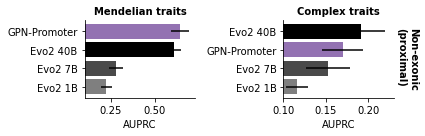

In [23]:
g = sns.FacetGrid(
    data=df.rename(columns={"score": "AUPRC"}),
    row="subset",
    col="dataset",
    margin_titles=True,
    sharex="col",
    sharey=False,
    #height=1.1,
    #aspect=1.8,
    height=2,
    aspect=1.5,
)

def my_boxplot(data, **kwargs):
    data = data.sort_values("AUPRC", ascending=False)
    ax = plt.gca()
    g = sns.barplot(
        data=data,
        y="model",
        x="AUPRC",
        ax=ax,
        palette=palette,
    )
    bar_height = g.patches[0].get_height()
    y_coords = sorted([bar.get_y() + bar_height / 2 for bar in g.patches])
    ax.errorbar(
        x=data["AUPRC"],
        y=y_coords,
        xerr=data["se"],
        fmt='none',
        color="black",
    )

g.map_dataframe(my_boxplot)
g.figure.subplots_adjust(hspace=0)

g.set(
    ylabel="",
    xlim=0.1,
)
g.set_titles(
    col_template="{col_name}", row_template="{row_name}",
    fontweight="bold",
    #size=12,
)
g.tight_layout()
plt.savefig("../../results/plots/performance_promoter.pdf", bbox_inches="tight")